# MOVIE RATING PREDICTION

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/kaggle/input/movielens"))


['users.dat', 'ratings.dat', 'movies.dat']


**First we will import all the necessary packages needed for developing our model.**

In [42]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**Now we will start reading the all the files in the dataset**

In [43]:
df_movie=pd.read_csv('/kaggle/input/movies/movies', sep = '::', engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [44]:
df_rating = pd.read_csv("/kaggle/input/movielens/ratings.dat",sep='::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [45]:
df_user = pd.read_csv("/kaggle/input/movielens/users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


**We will now see that how different values behave under different circumstances.**

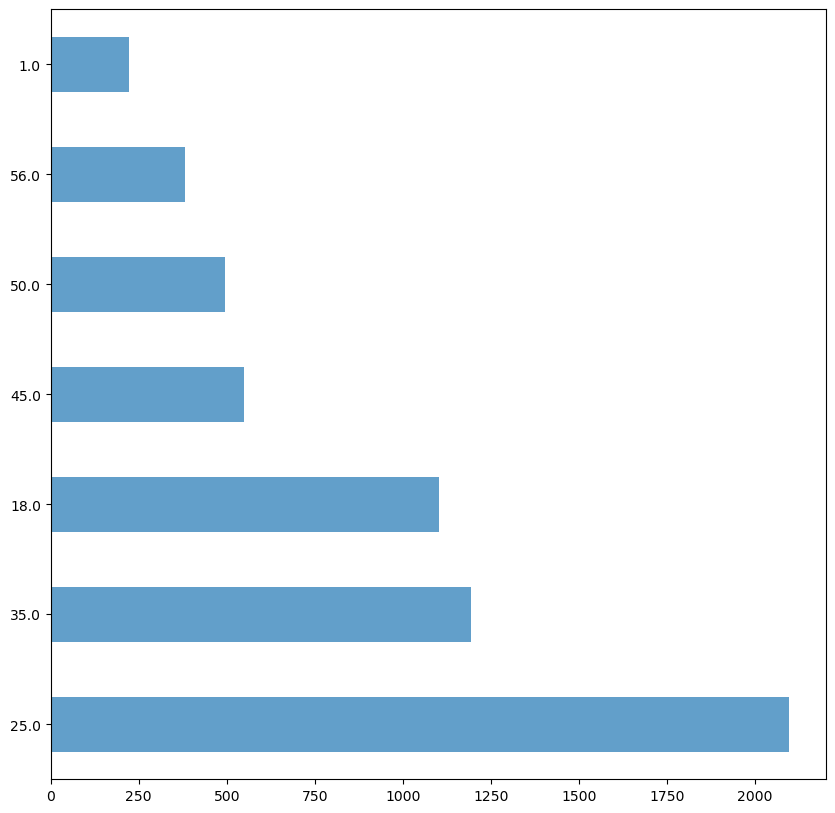

In [46]:
data['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

Text(0, 0.5, 'count')

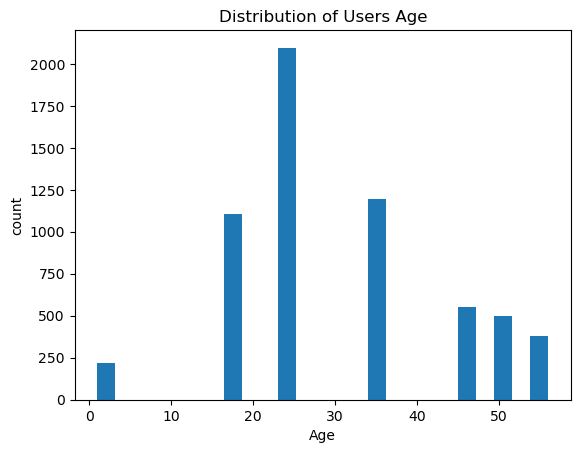

In [47]:
data.Age.plot.hist(bins=25)
plt.title('Distribution of Users Age')
plt.xlabel('Age')
plt.ylabel('count')

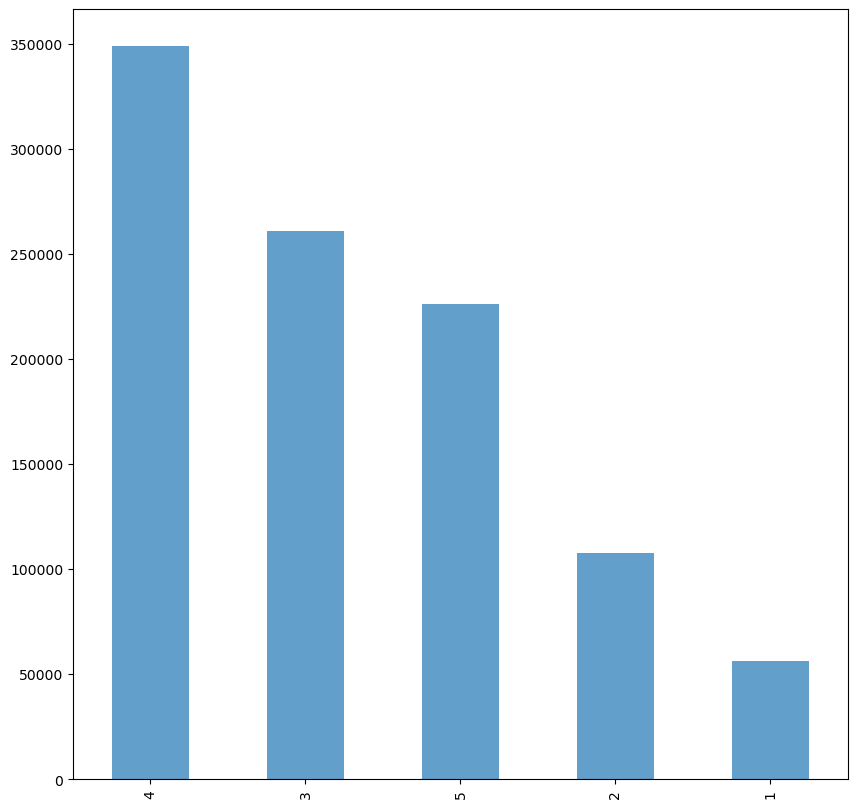

In [48]:
data['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

**Now we will concatenate all different files of the data under one dataframe. After the concatenation we will now consider the top 500 values for developing our model. After getting the data we will start analyzing the data. Once it is done we proceed to train the models.**

In [49]:
data=pd.concat([df_movie,df_rating,df_user],axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [50]:
first=data[:500]
first.isnull().sum()

MovieIDs      0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [51]:
x=first[['MovieID','Age','Occupation']]
x

,MovieID,Age,Occupation
0,661,56.0,16.0
1,914,25.0,15.0
2,3408,45.0,7.0
3,2355,25.0,20.0
4,1197,50.0,9.0
...,...,...,...
495,838,25.0,17.0
496,1007,35.0,17.0
497,1947,25.0,1.0
498,2966,18.0,2.0


In [52]:
y=first[['Ratings']]
y

,Ratings
0,3
1,3
2,4
3,5
4,3
...,...
495,4
496,3
497,5
498,5


**Now we will split the data for training and testing it.**

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.32,random_state=40)
xtrain.head()

,MovieID,Age,Occupation
331,1704,35.0,2.0
479,1569,45.0,7.0
415,2759,25.0,0.0
404,1733,25.0,20.0
222,3168,18.0,4.0


In [54]:
ytrain.head()

,Ratings
331,3
479,4
415,3
404,3
222,4


In [55]:
xtest.head()

,MovieID,Age,Occupation
167,1962,25.0,7.0
169,2943,50.0,17.0
461,368,25.0,7.0
253,2987,35.0,0.0
42,2692,45.0,17.0


In [56]:
ytest.head()

,Ratings
167,5
169,4
461,4
253,4
42,4


**We will now start prediction of the data with different models. First we start with the Decision Tree**

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=35)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=35)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix
pred=dt.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the Decision Tree is:',acc*100)

The accuracy in the Decision Tree is: 21.875


**The accuracy is low so we will try with other methods.**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

/tmp/ipykernel_32/1600736578.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier()

In [60]:
pred=rf.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the Random Forest Classifier is :',acc*100)

The accuracy in the Random Forest Classifier is : 28.125


In [61]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
pred=kn.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the K neighbors Classifiers is:',acc*100)

The accuracy in the K neighbors Classifiers is: 32.5


In [63]:
from sklearn.naive_bayes import GaussianNB
gf=GaussianNB()
gf.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [64]:
pred=gf.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the Gaussian Method is:',acc*100)

The accuracy in the Gaussian Method is: 38.125


In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
pred=lr.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the Logistic Reg is :',acc*100)

The accuracy in the Logistic Reg is : 41.25


In [67]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [68]:
pred=sv.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the Support Vector Classifier is:',acc*100)

The accuracy in the Support Vector Classifier is: 35.625


In [69]:
from sklearn.svm import LinearSVC
lsv=LinearSVC()
lsv.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [70]:
pred=lsv.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the Linear Support Vector Classifier is:',acc*100)

The accuracy in the Linear Support Vector Classifier is: 30.625000000000004


In [71]:
from sklearn.linear_model import SGDClassifier
sg=SGDClassifier()
sg.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [72]:
pred=sg.predict(xtest)
acc=accuracy_score(ytest,pred)
print('The accuracy in the SGD Classifier is:',acc*100)

The accuracy in the SGD Classifier is: 35.0


# SUMMARY:
**In the process we used different machine learning models and we got different accuracies in the models. In the models we got the highest accuracy in Logistic Regression process. Using all this methods we will predict the rating of the movie .**